/tmp/ipykernel_10920/3952840847.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_azure = pd.read_sql_query(query, connection)


0     20672.36
1     33196.29
2     33196.29
3     33196.29
4     33196.29
5     20672.36
6     33196.29
7     33196.29
8     33196.29
9     17280.04
10    20672.36
Name: prediction, dtype: float64
0     18559.10
1     18722.42
2     18722.42
3     18841.48
4     31340.44
5     31340.44
6     31340.44
7     30822.76
8     30260.69
9     19453.44
10    19069.18
Name: predicted_price, dtype: float64


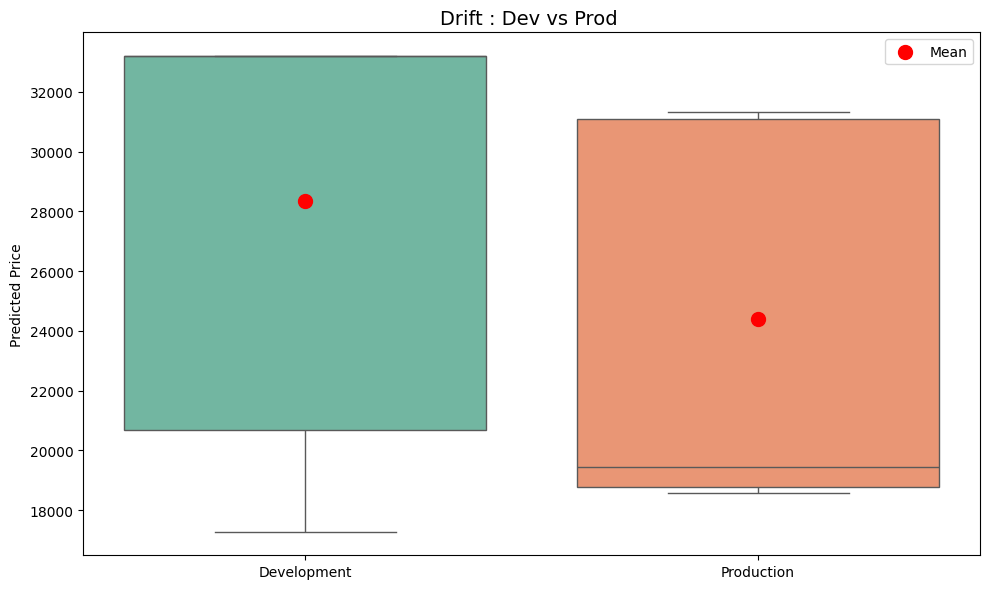

In [21]:
# Import necessary libraries
import sqlite3
import os
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Function to connect to SQLite
def connect_to_sqlite():
    db_path = os.path.abspath("cars.db")
    connection = sqlite3.connect(db_path)
    return connection

# Function to connect to Azure SQL
def connect_to_azure():
    connection_string = os.getenv("DATABASE_URL")
    connection = pyodbc.connect(connection_string)
    return connection

# Fetch the first 10 predictions from SQLite
def get_predictions_from_sqlite():
    connection = connect_to_sqlite()
    query = "SELECT prediction FROM Predictions" # LIMIT 10"
    df_sqlite = pd.read_sql_query(query, connection)
    connection.close()
    return df_sqlite

# Fetch the first 10 predicted prices from Azure SQL
def get_predictions_from_azure():
    connection = connect_to_azure()
    # query = "SELECT TOP 10 predicted_price FROM CarPredictions"
    query = "SELECT * FROM [dbo].[CarPredictions] WHERE predicted_price BETWEEN 18500 AND 40000;" 
    df_azure = pd.read_sql_query(query, connection)
    connection.close()
    return df_azure

# Plotting side-by-side box plots for predictions with mean values
def plot_comparisons(df_sqlite, df_azure):
    # Create a new DataFrame with both datasets for easier comparison
    combined_data = pd.DataFrame({
        'Development': df_sqlite['prediction'],
        'Production': df_azure['predicted_price']
    })
    print(df_sqlite['prediction'])
    print(df_azure['predicted_price'])
    # Calculate mean values
    means = combined_data.mean()

    # Set up the plot
    plt.figure(figsize=(10, 6))
    
    # Create box plots for both prediction sets
    sns.boxplot(data=combined_data, palette="Set2")
    
    # Add mean values to the plot
    for i, mean in enumerate(means):
        plt.scatter(i, mean, color='red', label='Mean' if i == 0 else "", s=100, zorder=5)

    # Add titles and labels
    plt.title("Drift : Dev vs Prod ", fontsize=14)
    plt.ylabel("Predicted Price")
    # plt.xlabel("Source")
    
    # Show the plot with legends
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Fetch predictions
    df_sqlite_predictions = get_predictions_from_sqlite()
    df_azure_predictions = get_predictions_from_azure()

    # Plot box plots with mean values
    plot_comparisons(df_sqlite_predictions, df_azure_predictions)